# Лабораторная работа №1 Математическое моделирование финансового рынка Индии за 2023 год
---

Выполняли студенты группы 23КНТ6 Власов Артём Дмитриевич и Игорь Ким Геннадьевич

## Задание 1

### **1. Источник данных**

Данные получены с официального сайта **[NSE India (National Stock Exchange of India)](https://www.nseindia.com/)** через раздел [Security-wise Archives (Equities)](https://www.nseindia.com/report-detail/eq_security). Для просмотра нужен ВПН

Источник предоставляет проверенные биржевые данные по всем торгуемым акциям на NSE.

---

### **2. Описание фондового рынка Индии**

Национальная фондовая биржа Индии (NSE):

* основана в **1992 году**, электронные торги введены в **1994 году**
* одна из крупнейших бирж Азии по рыночной капитализации
* основной индекс: **NIFTY 50**
* технология торгов — полностью электронная система NEAT
* количество листингов — более **2 000 акций**

Биржа предоставляет широкий набор инструментов: акции, ETF, облигации, деривативы, товарные контракты.

---

### **3. Состав датасета**

Датасет включает **10 крупнейших индийских публичных компаний** из разных отраслей:

| Тикер          | Компания                           | Сектор                             |
| -------------- | ---------------------------------- | ---------------------------------- |
| **ADANIGREEN** | Adani Green Energy                 | Возобновляемая энергия             |
| **HDFCBANK**   | HDFC Bank                          | Банковский сектор                  |
| **HINDUNILVR** | Hindustan Unilever                 | FMCG (товары повседневного спроса) |
| **INFY**       | Infosys                            | IT / консалтинг                    |
| **KOTAKBANK**  | Kotak Mahindra Bank                | Банковский сектор                  |
| **LT**         | Larsen & Toubro                    | Инфраструктура, инжиниринг         |
| **OFSS**       | Oracle Financial Services Software | IT / финтех                        |
| **RELIANCE**   | Reliance Industries                | Конгломерат, энергетика            |
| **SBIN**       | State Bank of India (SBI)          | Государственный банк               |
| **TCS**        | Tata Consultancy Services          | IT / аутсорсинг                    |

Эти компании входят в состав ключевых индексов:
**NIFTY 50, NIFTY 100, NIFTY 500**.

---

### **4. Период и частота наблюдений**

Период:
**1 января 2023 — 31 декабря 2023**

Количество торговых дней в периоде: около **250**, потому что учитываются:

* биржевые выходные
* национальные праздники
* нерабочие дни NSE

---

### **5. Структура данных и переменные**

Для каждой компании каждая строка датасета содержит:

| Поле            | Описание                            |
| --------------- | ----------------------------------- |
| **COMPANY**     | Тикер компании                      |
| **SERIES (EQ)** | Тип инструмента (EQ = акции)        |
| **DATE**        | Дата торгов                         |
| **OPEN**        | Цена открытия                       |
| **HIGH**        | Максимальная цена дня               |
| **LOW**         | Минимальная цена дня                |
| **CLOSE**       | Цена закрытия                       |
| **LAST**        | Последняя сделка                    |
| **VWAP**        | Средневзвешенная цена по объёму     |
| **VOLUME**      | Количество акций, проданных за день |
| **TURNOVER**    | Денежный оборот (рупии ₹)             |
| **TRADES**      | Количество сделок                   |

---

### **6. Объём и формат датасета**

* Количество компаний: **10**
* Количество торговых дней у каждой компании: ≈ **250**
* Общее число строк: **10 × 250 ≈ 2500**
* Формат: **CSV / Excel**
* Структура: блоки по компаниям, отсортированные по дате (сначала данные за 250 дней о первой компании, затем 250 дней о другой и т.д.)

---

### **7. Качество и полнота данных**

Датасет:

* содержит полный годовой период
* не имеет пропусков для тикеров из NIFTY 50 (кроме официальных нерабочих дней)
* использует только **серии EQ**, что соответствует требованиям для анализа ликвидных акций
* включает ключевые параметры для финансового анализа

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

df = pd.read_excel("../data/Фондовый_рынок_Индии.xlsx", thousands=",")
df

,Company,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,ADANIENT,2023-01-02,3858.35,3870.00,3874.00,3822.55,3843.0,3841.20,3847.82,923051,3.551734e+09,42124,189781.0,20.56
1,ADANIENT,2023-01-03,3841.20,3841.90,3852.85,3791.00,3828.1,3830.95,3830.96,799905,3.064404e+09,38042,154009.0,19.25
2,ADANIENT,2023-01-04,3830.95,3839.00,3874.95,3803.60,3822.0,3827.05,3833.86,1028377,3.942649e+09,47586,175210.0,17.04
3,ADANIENT,2023-01-05,3827.05,3827.05,3842.40,3756.90,3839.0,3829.80,3813.43,997006,3.802009e+09,49242,191568.0,19.21
4,ADANIENT,2023-01-06,3829.80,3829.00,3868.25,3797.05,3824.0,3824.25,3834.29,912159,3.497485e+09,44367,102222.0,11.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12295,WIPRO,2023-12-22,434.00,435.30,466.30,434.00,461.9,462.65,455.69,23040407,1.049935e+10,317516,7013988.0,30.44
12296,WIPRO,2023-12-26,462.65,454.00,475.80,448.35,469.7,470.10,466.73,27314322,1.274830e+10,326049,8573859.0,31.39
12297,WIPRO,2023-12-27,470.10,468.50,475.40,464.10,470.0,470.95,470.25,12631496,5.939929e+09,200199,4524489.0,35.82
12298,WIPRO,2023-12-28,470.95,472.55,477.40,467.65,469.0,469.45,471.54,8419978,3.970370e+09,152805,3436161.0,40.81


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12300 entries, 0 to 12299
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Company                 12300 non-null  object        
 1   Date                    12300 non-null  datetime64[ns]
 2   Prev Close              12300 non-null  float64       
 3   Open Price              12300 non-null  float64       
 4   High Price              12300 non-null  float64       
 5   Low Price               12300 non-null  float64       
 6   Last Price              12300 non-null  float64       
 7   Close Price             12300 non-null  float64       
 8   Average Price           12300 non-null  float64       
 9   Total Traded Quantity   12300 non-null  int64         
 10  Turnover                12300 non-null  float64       
 11  No. of Trades           12300 non-null  int64         
 12  Deliverable Qty         10332 non-null  float6

Выведем для примера график изменения цены закрытия для компании ADANIENT.

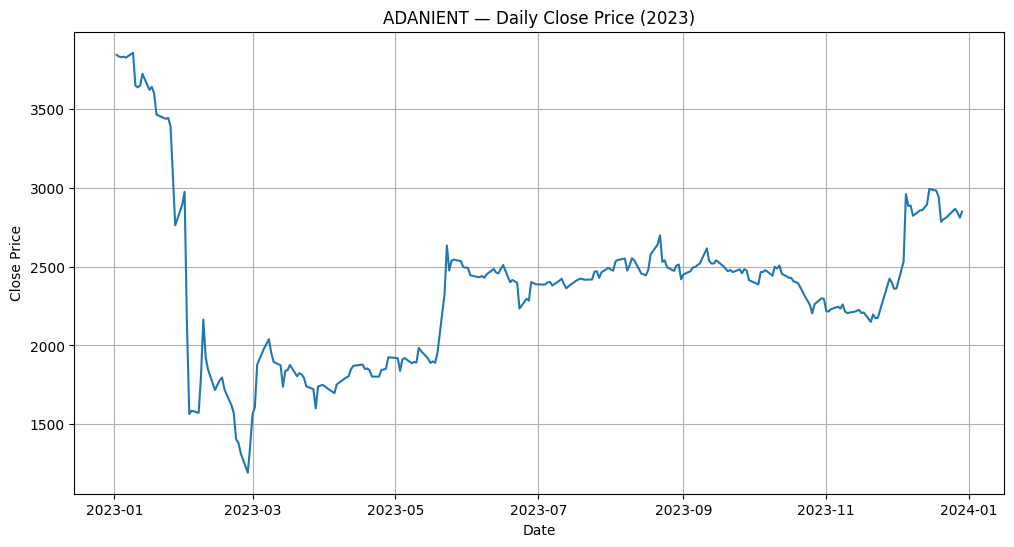

In [15]:
ADANIGREEN_data = df[df["Company"] == "ADANIENT"]

plt.figure(figsize=(12, 6))
plt.plot(ADANIGREEN_data["Date"], ADANIGREEN_data["Close Price"])
plt.title("ADANIENT — Daily Close Price (2023)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()

## Задание 2

Преобразовать данные по ценам в данные по доходностям с использованием логарифмической доходности.

In [16]:
df["log_return"] = df.groupby("Company")["Close Price"].transform(
    lambda x: np.log(x / x.shift(1))
)

data = df.groupby("Company")["log_return"].agg(
    mean_return="mean",
    std_return="std"
).reset_index()

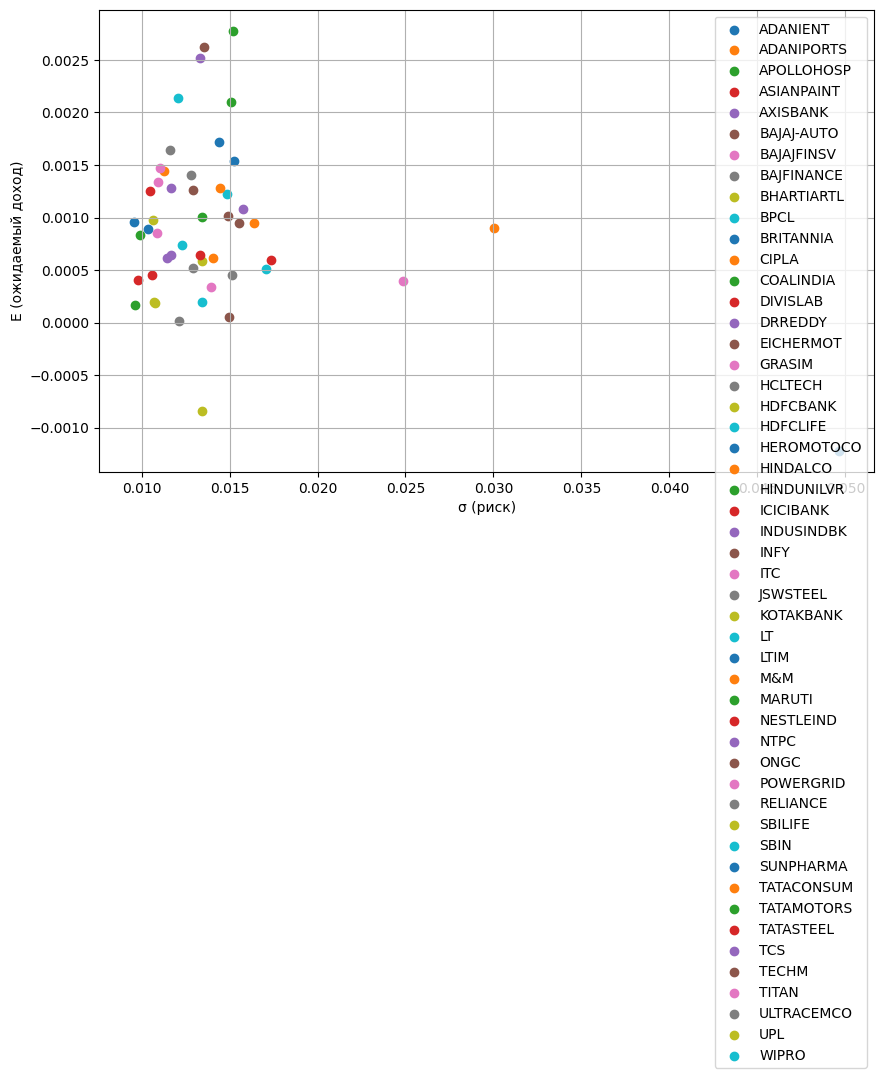

In [17]:
plt.figure(figsize=(10, 6))
for _, row in data.iterrows():
    plt.scatter(row["std_return"], row["mean_return"], label=row["Company"])

plt.legend()
plt.xlabel("σ (риск)")
plt.ylabel("E (ожидаемый доход)")
plt.grid(True)
plt.show()

# Задание 3
Найдите все Парето оптимальные активы

In [18]:
def find_pareto_frontier(df):
    # Сортировка по возрастанию риска
    sorted_df = df.sort_values('std_return')
    
    pareto = []
    max_return = -np.inf  # Начальный максимум дохода
    
    for _, row in sorted_df.iterrows():
        if row['mean_return'] > max_return:
            pareto.append(row)
            max_return = row['mean_return']
    
    return pd.DataFrame(pareto)

C:\Users\Artvl\AppData\Local\Temp\ipykernel_13828\664777280.py:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


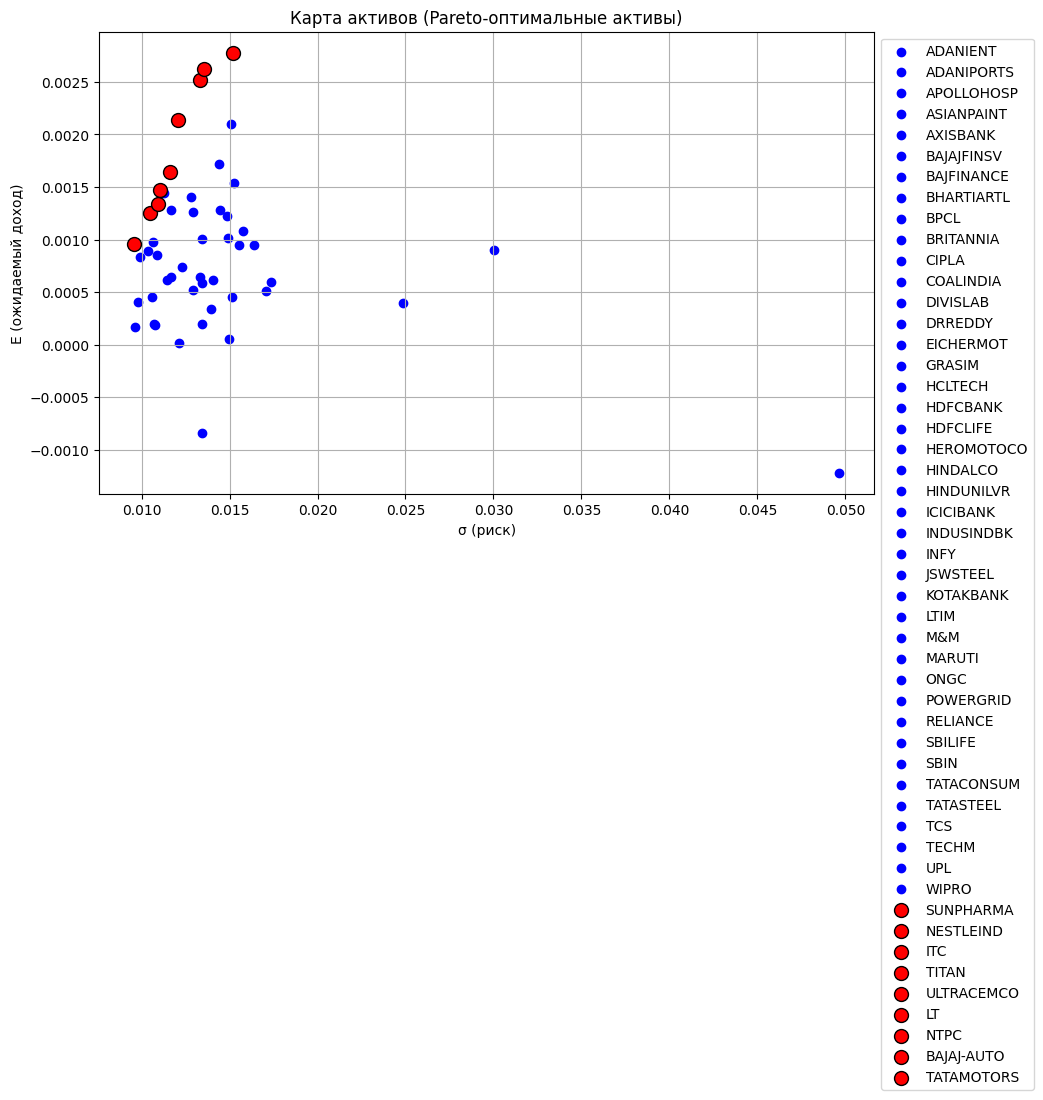

In [19]:
# Вычисление Pareto-фронта
pareto_df = find_pareto_frontier(data)

plt.figure(figsize=(10, 6))

# Все активы (синие точки с метками компаний)
for _, row in data.iterrows():
    if row["Company"] not in pareto_df["Company"].unique():
        plt.scatter(row["std_return"], row["mean_return"], color='blue', label=row["Company"])

# Pareto-оптимальные активы (красные точки)
for _, row in pareto_df.iterrows():
    plt.scatter(row["std_return"], row["mean_return"], color='red', s=100, edgecolor='black', zorder=3, label=row["Company"])  # Большие точки для выделения


plt.title("Карта активов (Pareto-оптимальные активы)")
plt.xlabel("σ (риск)")
plt.ylabel("E (ожидаемый доход)")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

#### Вывод
Из графика видно что Паретто оптимальными активами являются активы компаний ***HINDUNILVR, HDFCBANK, TCS и LT***.

## Задание 4
Задайте уровень доверия 0,95 и оцените VaR (Value at Risk = Сумма под Риском,
Потери = - Доходности) для Парето-оптимальных активов вашего рынка. Какой из
активов наиболее предпочтителен по этой характеристике? Где он расположен на
карте активов?

## **Формула VaR**
VaR на уровне доверия α — это граница потерь, которую портфель или актив не превысит с вероятностью α.

Пусть ($r_t$) — доходности. Потери:

$L_t = - r_t.$

Тогда VaR уровня α:

$\text{VaR}_{\alpha} = q_{\alpha}(L),$

где ($q_{\alpha}$) — α-квантиль выборки потерь.

## **Формула CVaR**

**CVaR (Conditional VaR, Expected Shortfall)** — это **средняя потеря при условии, что потери уже превысили VaR**.

$\text{CVaR}_{\alpha} = E[L \mid L \ge \text{VaR}*{\alpha}]$

In [20]:
def historical_var_cvar(series, alpha=0.95):
    """
    series: pandas Series of log returns.
    losses = -returns.
    VaR = quantile(losses, alpha)
    CVaR = mean(losses[losses >= VaR])
    """
    s = series.dropna()
    losses = -s  # Потери = отрицательные доходности

    VaR = losses.quantile(alpha)
    CVaR = losses[losses >= VaR].mean()

    return VaR, CVaR

In [21]:
pareto_companies = pareto_df['Company'].tolist()
results = []

for comp in pareto_companies:
    table = df[df['Company'] == comp]['log_return']  # Дневные доходности

    VaR95, CVaR95 = historical_var_cvar(table, alpha=0.95)

    results.append({
        'Company': comp,
        'VaR_95': VaR95,
        'CVaR_95': CVaR95,
    })

var_df = pd.DataFrame(results).set_index('Company')
var_df


,VaR_95,CVaR_95
Company,,
SUNPHARMA,0.014532,0.018057
NESTLEIND,0.014654,0.019509
ITC,0.015026,0.020929
TITAN,0.014695,0.019415
ULTRACEMCO,0.016107,0.020627
LT,0.016010,0.021087
NTPC,0.017601,0.023492
BAJAJ-AUTO,0.016401,0.021772
TATAMOTORS,0.018372,0.024019


#### Вывод
По VaR наиболее предпочтительным является актив HINDUNILVR, так как он имеет минимальное значение VaR, что означает наименьшие потери в 5% худших торговых дней. На карте активов он расположен в левом нижнем сегменте — с минимальным риском σ и умеренной ожидаемой доходностью E.

## Задание 5
Задайте уровень доверия 0,95 и оцените CVaR (Conditional Value at Risk = Условная
Сумма под Риском, Потери = - Доходности) для Парето-оптимальных активов вашего
рынка. Какой из активов наиболее предпочтителен по этой характеристике? Где он
расположен на карте активов? Сравните с результатом предыдущего пункта.

#### Вывод

По CVaR наиболее предпочтительным оказывается актив LT, поскольку он имеет минимальные средние хвостовые потери в экстремальных ситуациях. На карте активов он расположен правее и немного выше HINDUNILVR, что отражает несколько более высокий риск, но лучшую устойчивость к экстремальным просадкам.

Анализ показывает, что активы, оптимальные по VaR и по CVaR, не совпадают. Минимальный VaR у HINDUNILVR свидетельствует о его наибольшей устойчивости к умеренным негативным колебаниям. В то же время минимальный CVaR у LT отражает его более низкие потери в условиях экстремальных рыночных сценариев (то естьобеспечивает лучшую защиту капитала при реализации редких, но серьёзных падений рынка).

## Задание 6
Выберите несколько интересных (значимых) активов вашего рынка. Можно ли
считать наблюдаемые доходности конкретного актива повторной выборкой из
некоторого распределения (белый шум)? Поищите научные подходы к ответу на этот
вопрос (проверка гипотезы о случайности, Ивченко Г.И. Медведев Ю.И. Введение в
математическую статистику).

### Гипотеза о случайности
$X = (X_1, X_2 ... X_n)$ - выборка.\
$H_0$ - гипотеза случайности. Если она верна, то случайные величины в выборке независимы и не являются повторной выборкой из распределения, т.е. $F_X(x_1, ,x_n)=F(x_1)...F(x_n)$\
$H_1$ - гипотеза случайности отвергается, данные являются повторной выборкой

Для проверки гипотезы будет использоваться критерий инверсии

#### Критерий инверсий
Говорят, что компоненты $X_i, X_j$ образуют инверсию, если $i<j$ и $X_i > X_j$
Общее число инверсий можно назвать рассматривать как статистику $T_n$ для выборки.\
Интервал значений статистики: $0 <= T_n <= \frac{n(n-1)}{2}$ - только в таком случае гипотеза $H_0$ не отвергается.\
Чем ближе значение к границам интервала, тем больше **упорядоченность** данных. Гипотеза случайности отклоняется если данные упорядоченны, не хаотичны.

Матожидание и дисперсия статистики $T_n$ По Ивченко и Медведеву:\
$E(T_n)=\frac{n(n-1)}{4}$\
$D(T_n)=\frac{n(n-1)(2n+5)}{72}$

Нормализованная статистика: $T_n^* = \frac{T_n - E[T_n]}{D[T_n]^{1/2}}$

Гипотеза $H_0$ отклоняется при больших по модулю значениях статистики $|T_n^*| >= Z_{1-\alpha/2}$

Для проверки гипотезы были отобраны 4 крупнейшие индийские компании из разных производственных секторов.
| Тикер          | Компания                           | Сектор                             |
| -------------- | ---------------------------------- | ---------------------------------- |
| **HDFCBANK**   | HDFC Bank                          | Банковский сектор                  |
| **LT**         | Larsen & Toubro                    | Инфраструктура, инжиниринг         |
| **SBIN**       | State Bank of India (SBI)          | Государственный банк               |
| **TCS**        | Tata Consultancy Services          | IT / аутсорсинг                    |

Такой выбор позволяет изучить поведение разных отраслей на фондовом рынке.

In [22]:
def count_inversions(X):
    """Общее число инверсий"""
    inv_count = 0
    n = len(X)
    # Перебираем пары индексов,x_i > x_j
    for i in range(n - 1):
        for j in range(i+1, n):
            if X[i] > X[j]:
                inv_count += 1
    return inv_count

In [23]:
companies = ["HDFCBANK", "LT", "TCS", "SBIN"] # Банковский сектор, Инфраструктура, IT, Госбанк
alpha = 0.05
# критическая граница
z_crit = stats.norm.ppf(1 - alpha/2)

In [24]:
print("=== Проверка случайности лог-доходностей ===\n")

for company in companies:
    series = df[df["Company"] == company]["log_return"].dropna().values
    n = len(series)

    # статистика инверсий
    Tn = count_inversions(series)

    # матожидание и дисперсия
    E_Tn = n * (n - 1) / 4
    D_Tn = n * (n - 1) * (2 * n + 5) / 72

    # нормализованная статистика
    T = (Tn - E_Tn) / np.sqrt(D_Tn)

    # p-value
    p_value = 2 * stats.norm.sf(abs(T))

    # вывод
    decision = (
        "Гипотеза случайности ОТВЕРГАЕТСЯ (данные упорядочены)"
        if abs(T) >= z_crit
        else "Гипотеза случайности НЕ ОТВЕРГАЕТСЯ (данные случайны)"
    )

    print(f"Компания: {company}")
    print(f"n = {n}")
    print(f"Tn = {Tn}")
    print(f"T = {T:.4f} (crit = ±{z_crit:.2f})")
    print(f"p-value = {p_value:.4f}")
    print(f"Вывод: {decision}\n")

=== Проверка случайности лог-доходностей ===

Компания: HDFCBANK
n = 245
Tn = 14566
T = -0.5912 (crit = ±1.96)
p-value = 0.5544
Вывод: Гипотеза случайности НЕ ОТВЕРГАЕТСЯ (данные случайны)

Компания: LT
n = 245
Tn = 14196
T = -1.1683 (crit = ±1.96)
p-value = 0.2427
Вывод: Гипотеза случайности НЕ ОТВЕРГАЕТСЯ (данные случайны)

Компания: TCS
n = 245
Tn = 14811
T = -0.2090 (crit = ±1.96)
p-value = 0.8344
Вывод: Гипотеза случайности НЕ ОТВЕРГАЕТСЯ (данные случайны)

Компания: SBIN
n = 245
Tn = 14185
T = -1.1855 (crit = ±1.96)
p-value = 0.2358
Вывод: Гипотеза случайности НЕ ОТВЕРГАЕТСЯ (данные случайны)



#### Вывод

Для выбранных активов индийского фондового рынка (HDFCBANK, LT, TCS, SBIN) была проведена проверка гипотезы о случайности временных рядов логарифмических доходностей с использованием критерия инверсий.

По каждой из рассмотренных компаний наблюдаемое значение стандартизированной статистики T не превышает по модулю критическое значение, а соответствующие p-values существенно выше уровня значимости α=0.05.
Это означает, что нет статистически значимых оснований отвергнуть нулевую гипотезу о случайности наблюдений.

## Задание 7
Выберите несколько интересных (значимых) активов рынка из разных
производственных секторов. В предположении, что наблюдаемые доходности
являются повторной выборкой из некоторого распределения исследовать (выборочно)
распределения доходностей выбранных активов. Можно ли считать, что
распределения доходностей подчиняются нормальному закону распределения?

Для этого задания возьмём другие 4 крупнейшие индийские компании из разных производственных секторов.
Сначала построим гистограмму для каждой компании, чтобы визуально оценить распределение доходности.

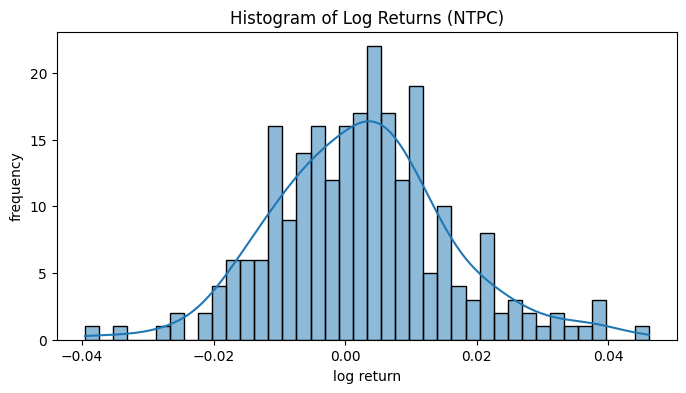

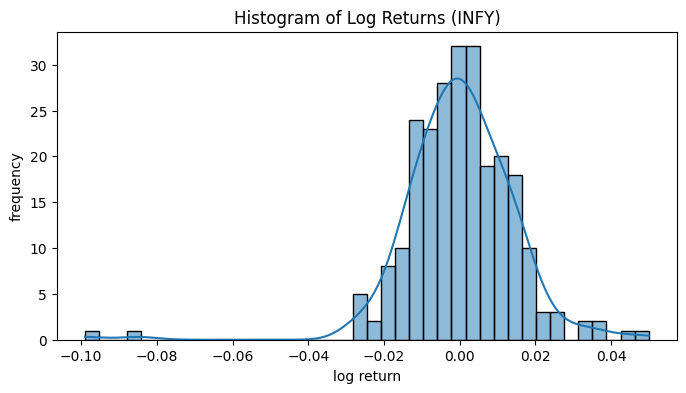

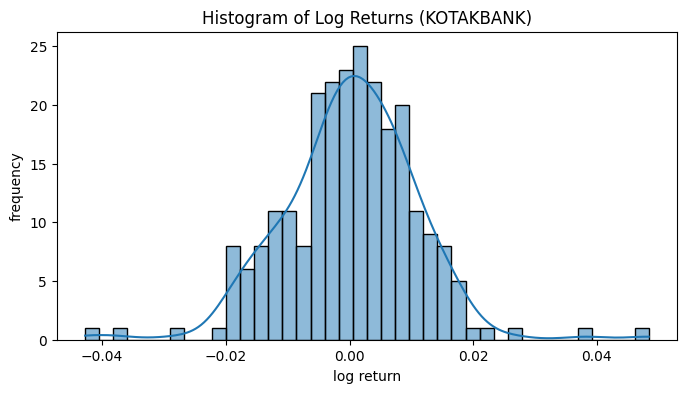

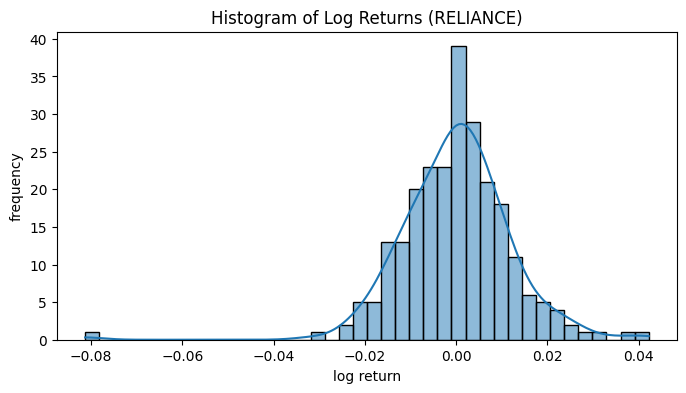

In [25]:
companies = ['NTPC', 'INFY', 'KOTAKBANK', 'RELIANCE'] # Энергетика, Колсантинг, Банковский сектор, Конгломерант

for company in companies:
    X = df[df["Company"] == company]["log_return"].dropna()
    plt.figure(figsize=(8, 4))
    sns.histplot(X, bins=40, kde=True)
    plt.title(f"Histogram of Log Returns ({company})")
    plt.xlabel("log return")
    plt.ylabel("frequency")
    plt.show()


Как мы видим, у компаний распределение немного похоже на нормальное распределение, но говорить уверено у нас нет оснований.

Сформируем гипотезы о нормальном распределении:\
**$H_0$** - гипотеза о нормальным распределении доходность компании\
**$H_1$** - альтернативная гипотеза, что распределение компании не соответствует нормальному распределению

Для проверки гипотезы будем использовать тест Jarque–Bera, которые часто используется  в статистике и эконометрике для оценки нормальности остатков или выборок данных.

Уровень значимость $\alpha$: 0.05
Если p_value < $\alpha$, то нулевая гипотеза отвергается и распределение не соответствует нормальному

In [26]:
alpha = 0.05 
for company in companies:
    X = df[df["Company"] == company]["log_return"].dropna()
    
    print("========")
    print(f"Данные о компании {company}")
    _, p_value_jarque_bera = stats.jarque_bera(X)

    if p_value_jarque_bera < alpha:
        print("Нулевая гипотеза ОТВЕРГАЕТСЯ")
        print(f"p_value = {p_value_jarque_bera} меньше alpha")
    else:
        print("Нулевая гипотеза НЕ ОТВЕРГАЕТСЯ")
        print(f"p_value = {p_value_jarque_bera} больше alpha")

Данные о компании NTPC
Нулевая гипотеза ОТВЕРГАЕТСЯ
p_value = 0.0192228618381932 меньше alpha
Данные о компании INFY
Нулевая гипотеза ОТВЕРГАЕТСЯ
p_value = 2.799841770273433e-295 меньше alpha
Данные о компании KOTAKBANK
Нулевая гипотеза ОТВЕРГАЕТСЯ
p_value = 3.137718393007545e-15 меньше alpha
Данные о компании RELIANCE
Нулевая гипотеза ОТВЕРГАЕТСЯ
p_value = 1.897174951470564e-149 меньше alpha


#### Вывод
Видно, что распределение доходностей каждый выбранной компании не соответствует нормальному рапсределению.

### Задание 8
Если в п.7 ответ отрицательный, какие другие законы распределения доходностей
соответствуют данным наблюдений?

Помимо нормального распределения, среди активов фондового рынка для описания распределения доходностей используются такие законы распределения активов как:
- Распределение Коши (Cauchy)
- Распределение Леви (Levy)

Для каждого распределения сначала выполним **подгонку параметров (fit)** на выборке с помощью `scipy.stats.<dist>.fit()`, после чего корректность модели проверим **критерием Колмогорова–Смирнова (KS-test)**, который сравнивает эмпирическую функцию распределения данных с теоретической CDF оценённого распределения. Нулевая гипотеза KS-теста формулируется как: **«данные взяты из выбранного распределения с подобранными параметрами»**. Если *p-value* больше уровня значимости $\alpha$, то **нет оснований отвергать** гипотезу; если *p-value* меньше 0.05 — **гипотеза отвергается**, и распределение считается несоответствующим доходностям.

In [27]:
for company in companies:
    X = df[df["Company"] == company]["log_return"].dropna()    

    # Оценка параметров распределения (loc, scale)
    loc, scale = stats.cauchy.fit(X)

    # KS-тест согласия
    stat, p = stats.kstest(X, 'cauchy', args=(loc, scale))
    print("========")
    print(f"Данные о компании {company}")

    print("1. Распределение Коши")
    print("loc =", loc, "scale =", scale)
    print("KS stat =", stat, "p-value =", p)
    if p > alpha:
        print("Нулевая гипотеза НЕ ОТВЕРГАЕТСЯ")
    else:
        print("Нулевая гипотеза ОТВЕРГАЕТСЯ")


    loc, scale = stats.levy.fit(X)
    stat, p = stats.kstest(X, 'levy', args=(loc, scale))

    print("\n2. Распределение Леви")
    print("loc =", loc, "scale =", scale)
    print("KS stat =", stat, "p-value =", p)
    if p > alpha:
        print("Нулевая гипотеза НЕ ОТВЕРГАЕТСЯ")
    else:
        print("Нулевая гипотеза ОТВЕРГАЕТСЯ")
    print("\n")

Данные о компании NTPC
1. Распределение Коши
loc = 0.002189432298749545 scale = 0.007518789948057385
KS stat = 0.0781277433309909 p-value = 0.09523605020540804
Нулевая гипотеза НЕ ОТВЕРГАЕТСЯ

2. Распределение Леви
loc = -0.04113720490791754 scale = 0.035874127544400954
KS stat = 0.49223698930674353 p-value = 2.685378904501308e-55
Нулевая гипотеза ОТВЕРГАЕТСЯ


Данные о компании INFY
1. Распределение Коши
loc = -0.00011054744195170216 scale = 0.007267176582130079
KS stat = 0.07612208892441341 p-value = 0.11099638843811455
Нулевая гипотеза НЕ ОТВЕРГАЕТСЯ

2. Распределение Леви
loc = -0.10301197678745647 scale = 0.09157910877841555
KS stat = 0.5750220759731356 p-value = 2.88175494603924e-77
Нулевая гипотеза ОТВЕРГАЕТСЯ


Данные о компании KOTAKBANK
1. Распределение Коши
loc = 0.0007391354613490075 scale = 0.005791975911559723
KS stat = 0.08399823757374636 p-value = 0.059453563577483326
Нулевая гипотеза НЕ ОТВЕРГАЕТСЯ

2. Распределение Леви
loc = -0.044459130916218725 scale = 0.0379977849

Из критерий Колмагорова-Смирнова видно что распределение доходности у компаний ***ADANIGREEN, INFY. RELIANCE и KOTAKBANK*** соответствуют распределению Коши.

### Задание 9
Попробуйте найти что-нибудь интересное (необычное) на вашем рынке. Используйте
любые известные вам методы анализа данных.

#### 1. Есть ли дни с аномально большим или аномально малым объёмом торгов

In [28]:
z_scores = np.abs(stats.zscore(df['Total Traded Quantity']))
outliers = df[z_scores > 3]  # Если z_scores > 3 сигм то такие дни считаются аномальными
print(f"Кол-во дней {len(outliers.Date)}")

Кол-во дней 250


In [29]:
outliers

,Company,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,log_return
22,ADANIENT,2023-02-02,2135.35,2348.85,2348.85,1494.75,1565.30,1565.25,1827.68,34474080,6.300769e+10,1563346,6032713.0,17.50,-0.310585
23,ADANIENT,2023-02-03,1565.25,1490.00,1679.90,1017.45,1531.00,1586.80,1354.92,43885579,5.946153e+10,1704970,4660661.0,10.62,0.013674
40,ADANIENT,2023-02-28,1193.50,1145.00,1398.00,1103.75,1371.35,1363.85,1307.03,33948366,4.437163e+10,1047492,7489663.0,22.06,0.133421
264,ADANIPORTS,2023-01-27,713.15,699.00,699.85,537.00,604.50,596.95,616.10,64194046,3.955017e+10,816215,13596537.0,21.18,-0.177858
265,ADANIPORTS,2023-01-30,596.95,620.00,656.60,566.95,600.80,597.00,604.66,58256575,3.522544e+10,835679,9197303.0,15.79,0.000084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10818,TATASTEEL,2023-12-21,129.75,128.70,131.45,127.85,131.40,131.00,130.01,34914399,4.539219e+09,198021,11793975.0,33.78,0.009588
10819,TATASTEEL,2023-12-22,131.00,132.40,134.75,131.75,133.45,133.55,133.44,37357334,4.984875e+09,213314,13276647.0,35.54,0.019279
10821,TATASTEEL,2023-12-27,135.20,135.85,138.90,135.50,137.00,137.20,137.40,48101400,6.609221e+09,240022,22266016.0,46.29,0.014685
10822,TATASTEEL,2023-12-28,137.20,138.15,138.75,136.85,138.25,138.15,137.88,34661176,4.779101e+09,215436,14885856.0,42.95,0.006900


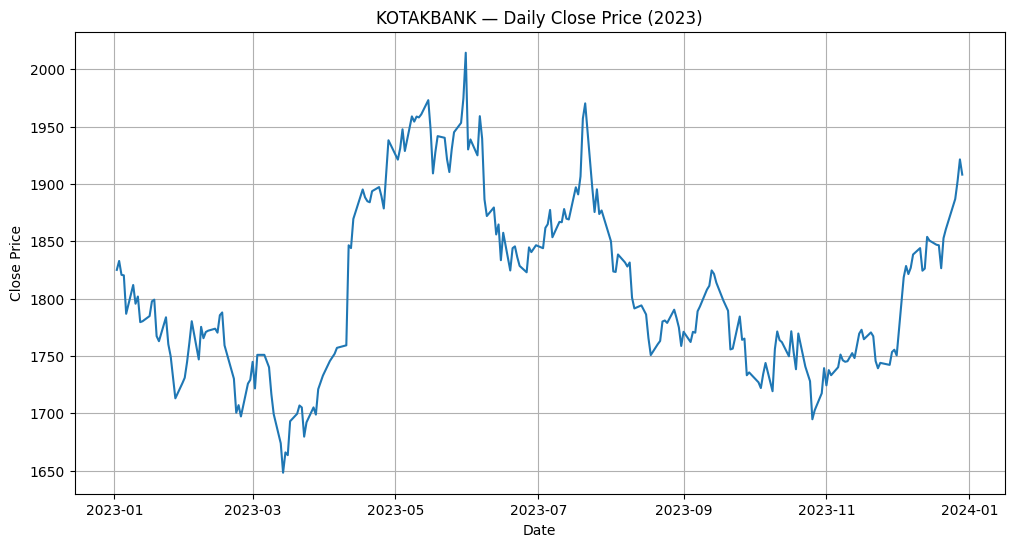

In [30]:
KOTAKBANK_data = df[df["Company"] == "KOTAKBANK"]

plt.figure(figsize=(12, 6))
plt.plot(KOTAKBANK_data["Date"], KOTAKBANK_data["Close Price"])
plt.title("KOTAKBANK — Daily Close Price (2023)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()

Как мы видим, из графика стоимости активов компании KOTAKBANK, 31 мая 2023 года цена за актив Компании достигла своего максимума в 2023, а из таблицы , что в этот день был с аномально большим или аномально малым объёмом торгов. Таким образом, можно сделать вывод, что эти два события связаны.

#### 2. Сравнение открытия и закрытия

In [31]:
df['Change'] = df['Close Price'] - df['Open Price']
df.sort_values('Change').head(10)                  # топ-10 падений

,Company,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,log_return,Change
21,ADANIENT,2023-02-01,2973.90,2995.00,3010.75,1941.20,2179.75,2135.35,2540.21,13525314,3.435717e+10,566482,1998987.0,14.78,-0.331244,-859.65
22,ADANIENT,2023-02-02,2135.35,2348.85,2348.85,1494.75,1565.30,1565.25,1827.68,34474080,6.300769e+10,1563346,6032713.0,17.50,-0.310585,-783.60
8319,NESTLEIND,2023-10-26,24262.70,24260.00,24260.60,23421.00,23450.00,23545.60,23709.77,126940,3.009718e+09,50118,59228.0,46.66,-0.030001,-714.40
8357,NESTLEIND,2023-12-20,25489.70,25694.00,25778.45,25055.20,25128.00,25097.75,25366.54,144488,3.665161e+09,45877,68273.0,47.25,-0.015496,-596.25
18,ADANIENT,2023-01-27,3388.95,3335.00,3346.50,2712.00,2768.50,2761.45,3010.35,14764368,4.444598e+10,562994,2525916.0,17.11,-0.204764,-573.55
8151,NESTLEIND,2023-02-17,19628.85,19575.05,19575.05,18822.05,19002.00,19021.30,19066.81,188435,3.592855e+09,48338,70386.0,37.35,-0.031441,-553.75
8258,NESTLEIND,2023-07-27,22799.90,22859.20,22900.00,22076.05,22338.00,22325.30,22368.79,179374,4.012379e+09,45591,87036.0,48.52,-0.021036,-533.90
8354,NESTLEIND,2023-12-15,24793.30,24850.05,24952.15,24220.00,24412.00,24366.40,24377.52,159541,3.889215e+09,56468,87640.0,54.93,-0.017368,-483.65
8132,NESTLEIND,2023-01-20,19681.10,19660.10,19667.85,19149.85,19180.10,19200.05,19296.35,72022,1.389762e+09,27956,40754.0,56.59,-0.024746,-460.05
8312,NESTLEIND,2023-10-16,23554.35,23550.00,23550.00,22975.05,23129.00,23108.55,23128.90,86608,2.003148e+09,27098,40799.0,47.11,-0.019108,-441.45


Выводы:

- ADANIGREEN в январе 2023 демонстрировал резкие падения с аномально высоким объёмом, это связано с публикацией расследования о манипулированием рынком компанией Adani и нарушением бухгалтерского учёта.

- OFSS тоже часто показывает падения, но с меньшим объёмом, т.е. происходили менее экстремальные события.

In [32]:
df.sort_values('Change', ascending=False).head(10)  # топ-10 ростов

,Company,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,log_return,Change
8356,NESTLEIND,2023-12-19,24354.25,24569.80,25705.00,24510.90,25499.0,25489.70,25297.53,352866,8.926638e+09,84656,101800.0,28.85,0.045568,919.90
8315,NESTLEIND,2023-10-19,23262.95,23256.90,24227.00,23100.50,24080.0,24132.35,23734.57,292412,6.940273e+09,81666,75471.0,25.81,0.036691,875.45
8187,NESTLEIND,2023-04-17,19465.35,19590.00,20410.00,19502.15,20225.1,20244.40,20137.00,194351,3.913646e+09,48426,80502.0,41.42,0.039242,654.40
8223,NESTLEIND,2023-06-07,21705.40,21749.90,22424.75,21749.90,22355.3,22367.75,22264.28,156812,3.491306e+09,30498,88274.0,56.29,0.030059,617.85
8196,NESTLEIND,2023-04-28,21147.30,21181.95,21849.60,21130.00,21750.0,21761.40,21546.92,166516,3.587906e+09,36311,116890.0,70.20,0.028626,579.45
8179,NESTLEIND,2023-03-31,19052.95,19155.00,19751.90,19155.00,19680.0,19704.50,19593.33,148444,2.908512e+09,38650,98135.0,66.11,0.033625,549.50
8320,NESTLEIND,2023-10-27,23545.60,23550.50,24228.00,23440.35,24050.0,24056.95,23850.53,130437,3.110992e+09,34960,67581.0,51.81,0.021485,506.45
8311,NESTLEIND,2023-10-13,23075.15,23075.05,23599.85,22955.40,23550.0,23554.35,23393.30,90791,2.123901e+09,31894,36595.0,40.31,0.020554,479.30
8188,NESTLEIND,2023-04-18,20244.40,20200.00,20700.00,20200.00,20585.2,20661.25,20486.45,139860,2.865235e+09,36124,54064.0,38.66,0.020382,461.25
8169,NESTLEIND,2023-03-16,17993.35,17990.00,18500.00,17967.75,18405.0,18450.65,18385.38,83043,1.526777e+09,30363,40940.0,49.30,0.025097,460.65


Выводы:

- ADANIGREEN в декабре 2023 показывают очень сильные росты с аномальным объёмом, что означает восстановлении репутации компании после обвинений.

- log_return > 0.05–0.18  означает резкое увеличение цены в процентном выражении, особенно для ADANIGREEN.

- OFSS также имеет сильные дни с ростом, что демонстрирует интерес инвесторов к крупной индийской IT компании

### Задание 10
Отчёт готов :)